In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def add_label_to_img(img_arr: np.array, label: bool) -> Image:
    layers_map = {
        1: 'L',
        3: 'RGB',
        4: 'RGBA'
    }
    layer_count = img_arr.shape[2] if len(img_arr.shape) == 3 else 1
    image = Image.fromarray(img_arr.astype('uint8'), layers_map[layer_count])
    draw = ImageDraw.Draw(image)
    if label:
        px, py = img_arr.shape[0] * 0.1, img_arr.shape[0] * 0.1
        d = img_arr.shape[0] * 0.1
        draw.ellipse((px - d, py - d, px + d, py + d), fill="green")
    return image

# Load train dataset

In [3]:
ROWS = int(64 / 4)
COLS = 4
COUNT = ROWS * COLS

In [4]:
DIR = 'data/train/classification/128'
values = [np.array(Image.open(f"{DIR}/{i:0>7}.png"), dtype=np.uint8) for i in range(COUNT)]
labels = np.loadtxt(f'{DIR}/labels.csv').astype(dtype=np.int).tolist()

# Look at train images

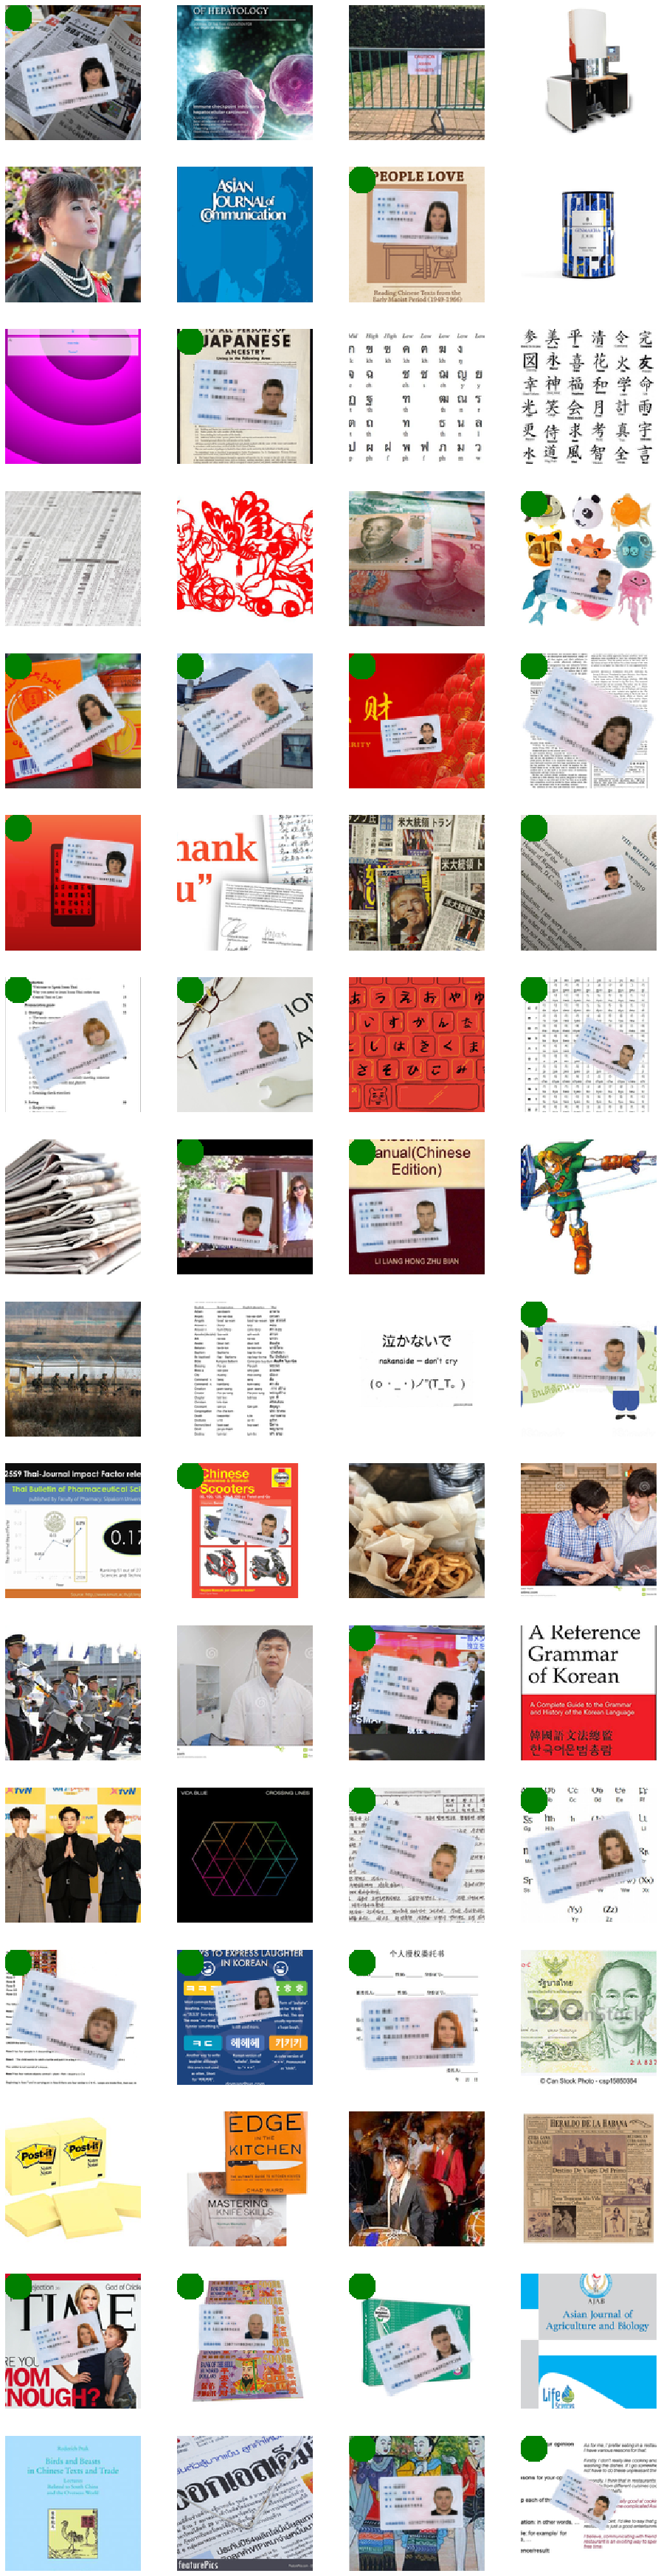

In [5]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS*4, ROWS*4))
for i in range(ROWS):
    for j in range(COLS):
        card, label = values[i*COLS + j], labels[i*COLS + j]
        axes[i, j].set_axis_off()
        axes[i, j].imshow(add_label_to_img(card, label));

# Look at prediction

In [ ]:
import torch
from torchvision import models
from torch import nn, optim, cuda
from torchvision.transforms import transforms

# Load model

In [ ]:
MODEL_PATH = './data/weights/resnet18_classification_v1.1.2.pt'
NUM_CLASSES = 2

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

model.load_state_dict(torch.load(MODEL_PATH))
model.eval();

# Load train samples

In [ ]:
to_tensor = transforms.ToTensor()
net_values = [
    to_tensor(
        np.array(Image.open(f"{DIR}/{i:0>7}.png"), dtype=np.uint8)
    ).unsqueeze(0)
    for i in range(64)
]

In [ ]:
all_net_values = torch.cat(net_values, 0)

# predict

In [ ]:
%%time
predicted_labels = model(all_net_values)
predicted_labels = [int(label[0] < label[1]) for label in predicted_labels]

In [ ]:
fig, axes = plt.subplots(ROWS, COLS, figsize=(COLS*4, ROWS*4))
for i in range(ROWS):
    for j in range(COLS):
        card, label = values[i*COLS + j], predicted_labels[i*COLS + j]
        axes[i, j].set_axis_off()
        axes[i, j].imshow(add_label_to_img(card, label));